<a href="https://colab.research.google.com/github/riddlemeS4m/machine-learning-scientist-datacamp/blob/dev-google/module-3-unsupervised-learning/intermediate_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 3: Unsupervised Learning in Python

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [ ]:
!pip install scikit-learn

In [2]:
csv_path = 'https://raw.githubusercontent.com/riddlemeS4m/machine-learning-scientist-datacamp/dev-google/module-3-unsupervised-learning/eurovision-2016.csv'

In [4]:
df = pd.read_csv(csv_path)
df.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [5]:
df['Jury Points'] = df['Jury Points'].fillna(0)
df['Televote Points'] = df['Televote Points'].fillna(0)
df.head(20)

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,0.0,0.0
1,Albania,Czech Republic,21,15,25,23,16,22,22,0.0,0.0
2,Albania,The Netherlands,22,14,23,24,21,24,24,0.0,0.0
3,Albania,Azerbaijan,19,12,11,21,11,13,19,0.0,0.0
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0
5,Albania,Italy,4,10,3,7,2,3,2,8.0,10.0
6,Albania,Israel,10,2,18,4,12,8,17,3.0,0.0
7,Albania,Bulgaria,11,3,6,13,6,7,3,4.0,8.0
8,Albania,Sweden,16,8,15,6,15,11,8,0.0,3.0
9,Albania,Germany,18,17,20,11,17,18,15,0.0,0.0


In [6]:
albania = df[df['From country'] == 'Albania']
albania.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,0.0,0.0
1,Albania,Czech Republic,21,15,25,23,16,22,22,0.0,0.0
2,Albania,The Netherlands,22,14,23,24,21,24,24,0.0,0.0
3,Albania,Azerbaijan,19,12,11,21,11,13,19,0.0,0.0
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [7]:
albania.sort_values(['Jury Points'], ascending=False).head(20)

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
12,Albania,Australia,1,1,2,1,3,1,1,12.0,12.0
10,Albania,France,3,9,1,9,1,2,11,10.0,0.0
5,Albania,Italy,4,10,3,7,2,3,2,8.0,10.0
17,Albania,Russia,7,4,7,5,7,4,4,7.0,7.0
18,Albania,Spain,9,5,4,12,4,5,23,6.0,0.0
24,Albania,United Kingdom,2,6,10,10,10,6,18,5.0,0.0
7,Albania,Bulgaria,11,3,6,13,6,7,3,4.0,8.0
6,Albania,Israel,10,2,18,4,12,8,17,3.0,0.0
21,Albania,Malta,5,21,5,16,5,9,16,2.0,0.0
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [18]:
df['Jury Sum'] = df['Jury A'] + df['Jury B'] + df['Jury C'] + df['Jury D'] + df['Jury E']
df.head(20)

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points,Jury Sum
0,Albania,Belgium,20,16,24,22,24,25,14,0.0,0.0,106
1,Albania,Czech Republic,21,15,25,23,16,22,22,0.0,0.0,100
2,Albania,The Netherlands,22,14,23,24,21,24,24,0.0,0.0,104
3,Albania,Azerbaijan,19,12,11,21,11,13,19,0.0,0.0,74
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0,53
5,Albania,Italy,4,10,3,7,2,3,2,8.0,10.0,26
6,Albania,Israel,10,2,18,4,12,8,17,3.0,0.0,46
7,Albania,Bulgaria,11,3,6,13,6,7,3,4.0,8.0,39
8,Albania,Sweden,16,8,15,6,15,11,8,0.0,3.0,60
9,Albania,Germany,18,17,20,11,17,18,15,0.0,0.0,83


In [25]:
samples = pd.pivot_table(df, values='Jury Points', index=['From country'], columns=['To country'], aggfunc=np.sum, fill_value=0)
samples.head()

To country,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,France,...,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,
Albania,0,12,0,0,0,4,0,0,0,10,...,0,2,0,7,0,6,0,0,0,5
Armenia,0,5,0,0,4,7,0,6,1,12,...,0,8,0,2,0,3,0,0,0,0
Australia,0,0,0,0,12,8,1,0,0,6,...,7,0,0,0,0,5,0,3,2,4
Austria,2,12,0,0,5,0,6,0,4,7,...,1,10,0,3,0,0,8,0,0,0
Azerbaijan,0,7,0,0,0,8,0,0,0,0,...,5,6,2,12,0,1,0,0,10,0


In [9]:
country_names = samples.index.values
country_names

array(['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Belarus', 'Belgium', 'Bosnia & Herzegovina', 'Bulgaria',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'F.Y.R. Macedonia', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Latvia', 'Lithuania', 'Malta', 'Moldova', 'Montenegro', 'Norway',
       'Poland', 'Russia', 'San Marino', 'Serbia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'The Netherlands', 'Ukraine',
       'United Kingdom'], dtype=object)

In [10]:
print(f'Country names: {len(country_names)}')
print(f'Samples: {len(samples)}')

Country names: 42
Samples: 42


In [11]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

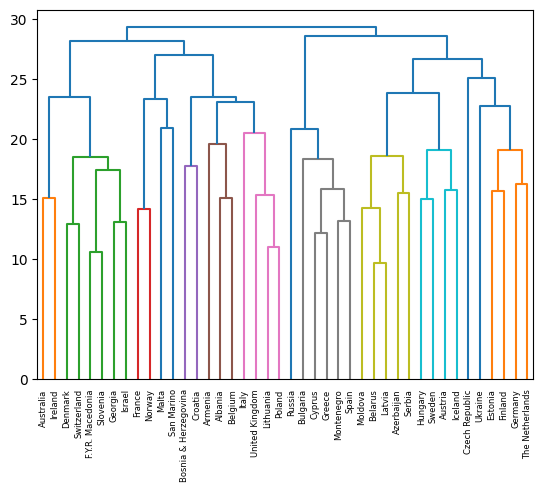

In [26]:
mergings = linkage(samples, method='complete')
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()

In [13]:
from scipy.cluster.hierarchy import fcluster

In [27]:
mergings = linkage(samples, method='complete')
labels = fcluster(mergings, 15, criterion='distance')
labels

array([11, 13,  1, 26, 22, 21, 12,  9, 19, 10, 17, 33,  3, 28,  4, 29,  6,
        5, 30, 17, 24, 27,  2,  5, 16, 21, 14,  7, 21, 18,  6, 14, 20,  8,
       23,  4, 18, 25,  3, 31, 32, 15], dtype=int32)

In [28]:
pairs = pd.DataFrame({'labels': labels, 'countries': country_names})
pairs.sort_values('labels').head(10)

,labels,countries
2,1,Australia
22,2,Ireland
38,3,Switzerland
12,3,Denmark
35,4,Slovenia
14,4,F.Y.R. Macedonia
23,5,Israel
17,5,Georgia
16,6,France
30,6,Norway


In [29]:
pairs.groupby('labels').count()

,countries
labels,
1,1
2,1
3,2
4,2
5,2
6,2
7,1
8,1
9,1


In complete linkage, the distance between clusters is the distance between the points of the clusters that have the <i>furthest</i> total distance between each other. In single linkage, the distance between  clusters is the distance between the points of the clusters that have the <i>closest</i> total distance between each other.